## Analyse exploratoire

In [242]:
# Importation des librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
data = pd.read_csv("../output/cleaned_data/data_clean.csv", parse_dates=['date'])
data.head()

,order_id,date,product,category,price,quantity,total_sales,customer_name,customer_location,payment_method,status
0,ORD0001,2025-03-14,Running Shoes,Footwear,60,3,180,Emma Clark,New York,Debit Card,Cancelled
1,ORD0002,2025-03-20,Headphones,Electronics,100,4,400,Emily Johnson,San Francisco,Debit Card,Pending
2,ORD0003,2025-02-15,Running Shoes,Footwear,60,2,120,John Doe,Denver,Amazon Pay,Cancelled
3,ORD0004,2025-02-19,Running Shoes,Footwear,60,3,180,Olivia Wilson,Dallas,Credit Card,Pending
4,ORD0005,2025-03-10,Smartwatch,Electronics,150,3,450,Emma Clark,New York,Debit Card,Pending


### Analyse univariée

#### Variables qualitatives

Le mode est Smartphone
product
Smartphone         35
Smartwatch         34
Running Shoes      27
Headphones         25
Book               25
Laptop             24
Refrigerator       24
T-Shirt            20
Jeans              20
Washing Machine    16
Name: count, dtype: int64


<Axes: title={'center': 'Répartition du nombre de commande par produit'}, xlabel='product'>

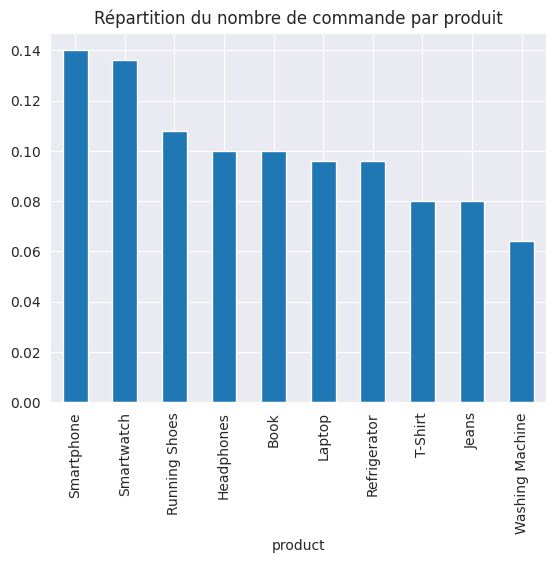

In [27]:
# variable product
print("Le mode est", data['product'].mode()[0])
print(data['product'].value_counts())
plt.title("Répartition du nombre de commande par produit")
data['product'].value_counts(normalize=True).plot(kind='bar')

Les produits les mieux vendus de notre échantillon sont les smartphones et smartwatch. Les moins vendues sont les T-shirts, les jeans et les machines à laver.

Le mode est Electronics
category
Electronics        118
Home Appliances     40
Clothing            40
Footwear            27
Books               25
Name: count, dtype: int64


<Axes: title={'center': 'Proportions des commandes par catégorie de produits'}>

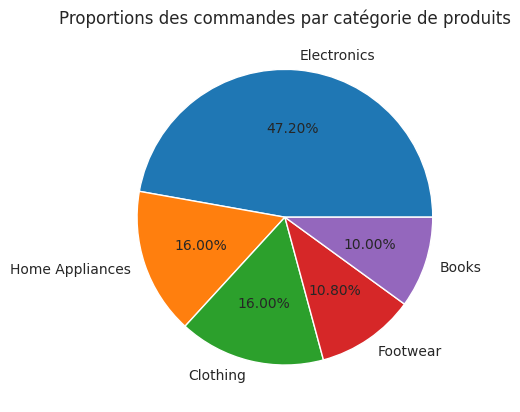

In [28]:
# variable category
print("Le mode est", data['category'].mode()[0])
print(data['category'].value_counts())
plt.title("Proportions des commandes par catégorie de produits")
data['category'].value_counts(normalize=True).plot(kind='pie', autopct="%.2f%%", label="")

Par contre, les ventes par catégories de produits sont clairement dominés par les produits Electroniques, qui representent ici près de la moitié (47,20%) des commandes de notre échantillon.

Le mode est Houston
customer_location
Houston          32
Miami            31
Dallas           29
New York         26
Boston           26
Denver           26
Chicago          22
Seattle          22
San Francisco    19
Los Angeles      17
Name: count, dtype: int64


<Axes: title={'center': 'Répartition du nombre de commandes par ville'}, xlabel='customer_location'>

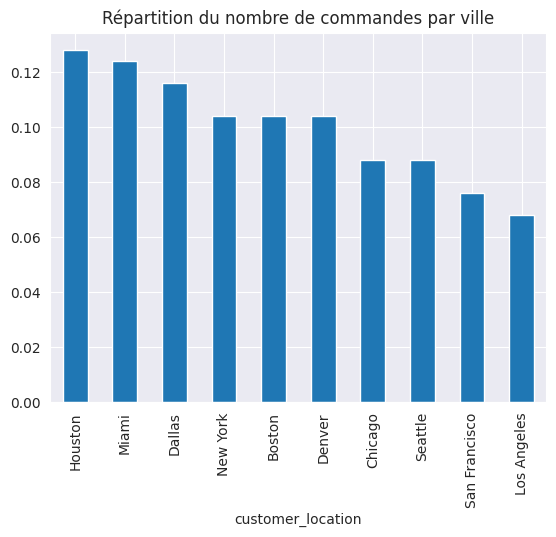

In [29]:
# variable customer_location
print("Le mode est", data['customer_location'].mode()[0])
print(data['customer_location'].value_counts())
plt.title("Répartition du nombre de commandes par ville")
data['customer_location'].value_counts(normalize=True).plot(kind='bar')

On retiendra que les commandes viennent principalement de Houston, Miami et Dallas.

Le mode est PayPal
payment_method
PayPal         60
Credit Card    54
Debit Card     53
Gift Card      42
Amazon Pay     41
Name: count, dtype: int64


<Axes: title={'center': 'Proportions du nombre de commandes par moyen de paiement'}>

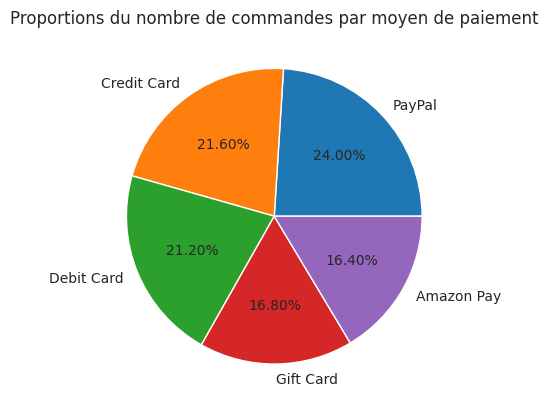

In [30]:
# variable payment_method
print("Le mode est", data['payment_method'].mode()[0])
print(data['payment_method'].value_counts())
plt.title("Proportions du nombre de commandes par moyen de paiement")
data['payment_method'].value_counts(normalize=True).plot(kind='pie', autopct="%.2f%%", label="")

Le mode de paiement le plus utilisé est Paypal. Cependant, il est bien clair que la répartition du nombre de moyens de paiement est à peu près équitable d'un moyen de paiement à l'autre (on n'observe pas de différences vraiment significatives). Il semble donc que les clients n'ont pas de préférence pour un moyen de paiement en particulier.

Le mode est Completed
status
Completed    88
Pending      85
Cancelled    77
Name: count, dtype: int64


<Axes: title={'center': 'Répartition du nombre de commandes par statut de commande'}, xlabel='status'>

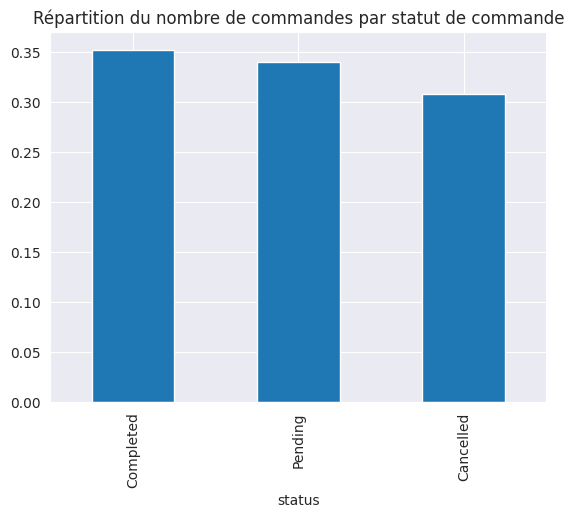

In [31]:
# variable status
print("Le mode est", data['status'].mode()[0])
print(data['status'].value_counts())
plt.title("Répartition du nombre de commandes par statut de commande")
data['status'].value_counts(normalize=True).plot(kind='bar')

Le nombre de commandes ne varie pas vraiment d'un statut à l'autre. C'est-à-dire qu'aucun statut ne prend le dessus sur un autre. Ce qui signifie que deux clients sur trois ne complètent pas leur commande. Et du coup, on note un faible taux d'engagement chez les clients à compléter leur commande. Il faudra donc trouver des solutions à cela.

#### Variables quantitatives

La moyenne: 343.58
L'écart-type: 380.6358076590918
La médiane: 150.0
1er quartile 40.0


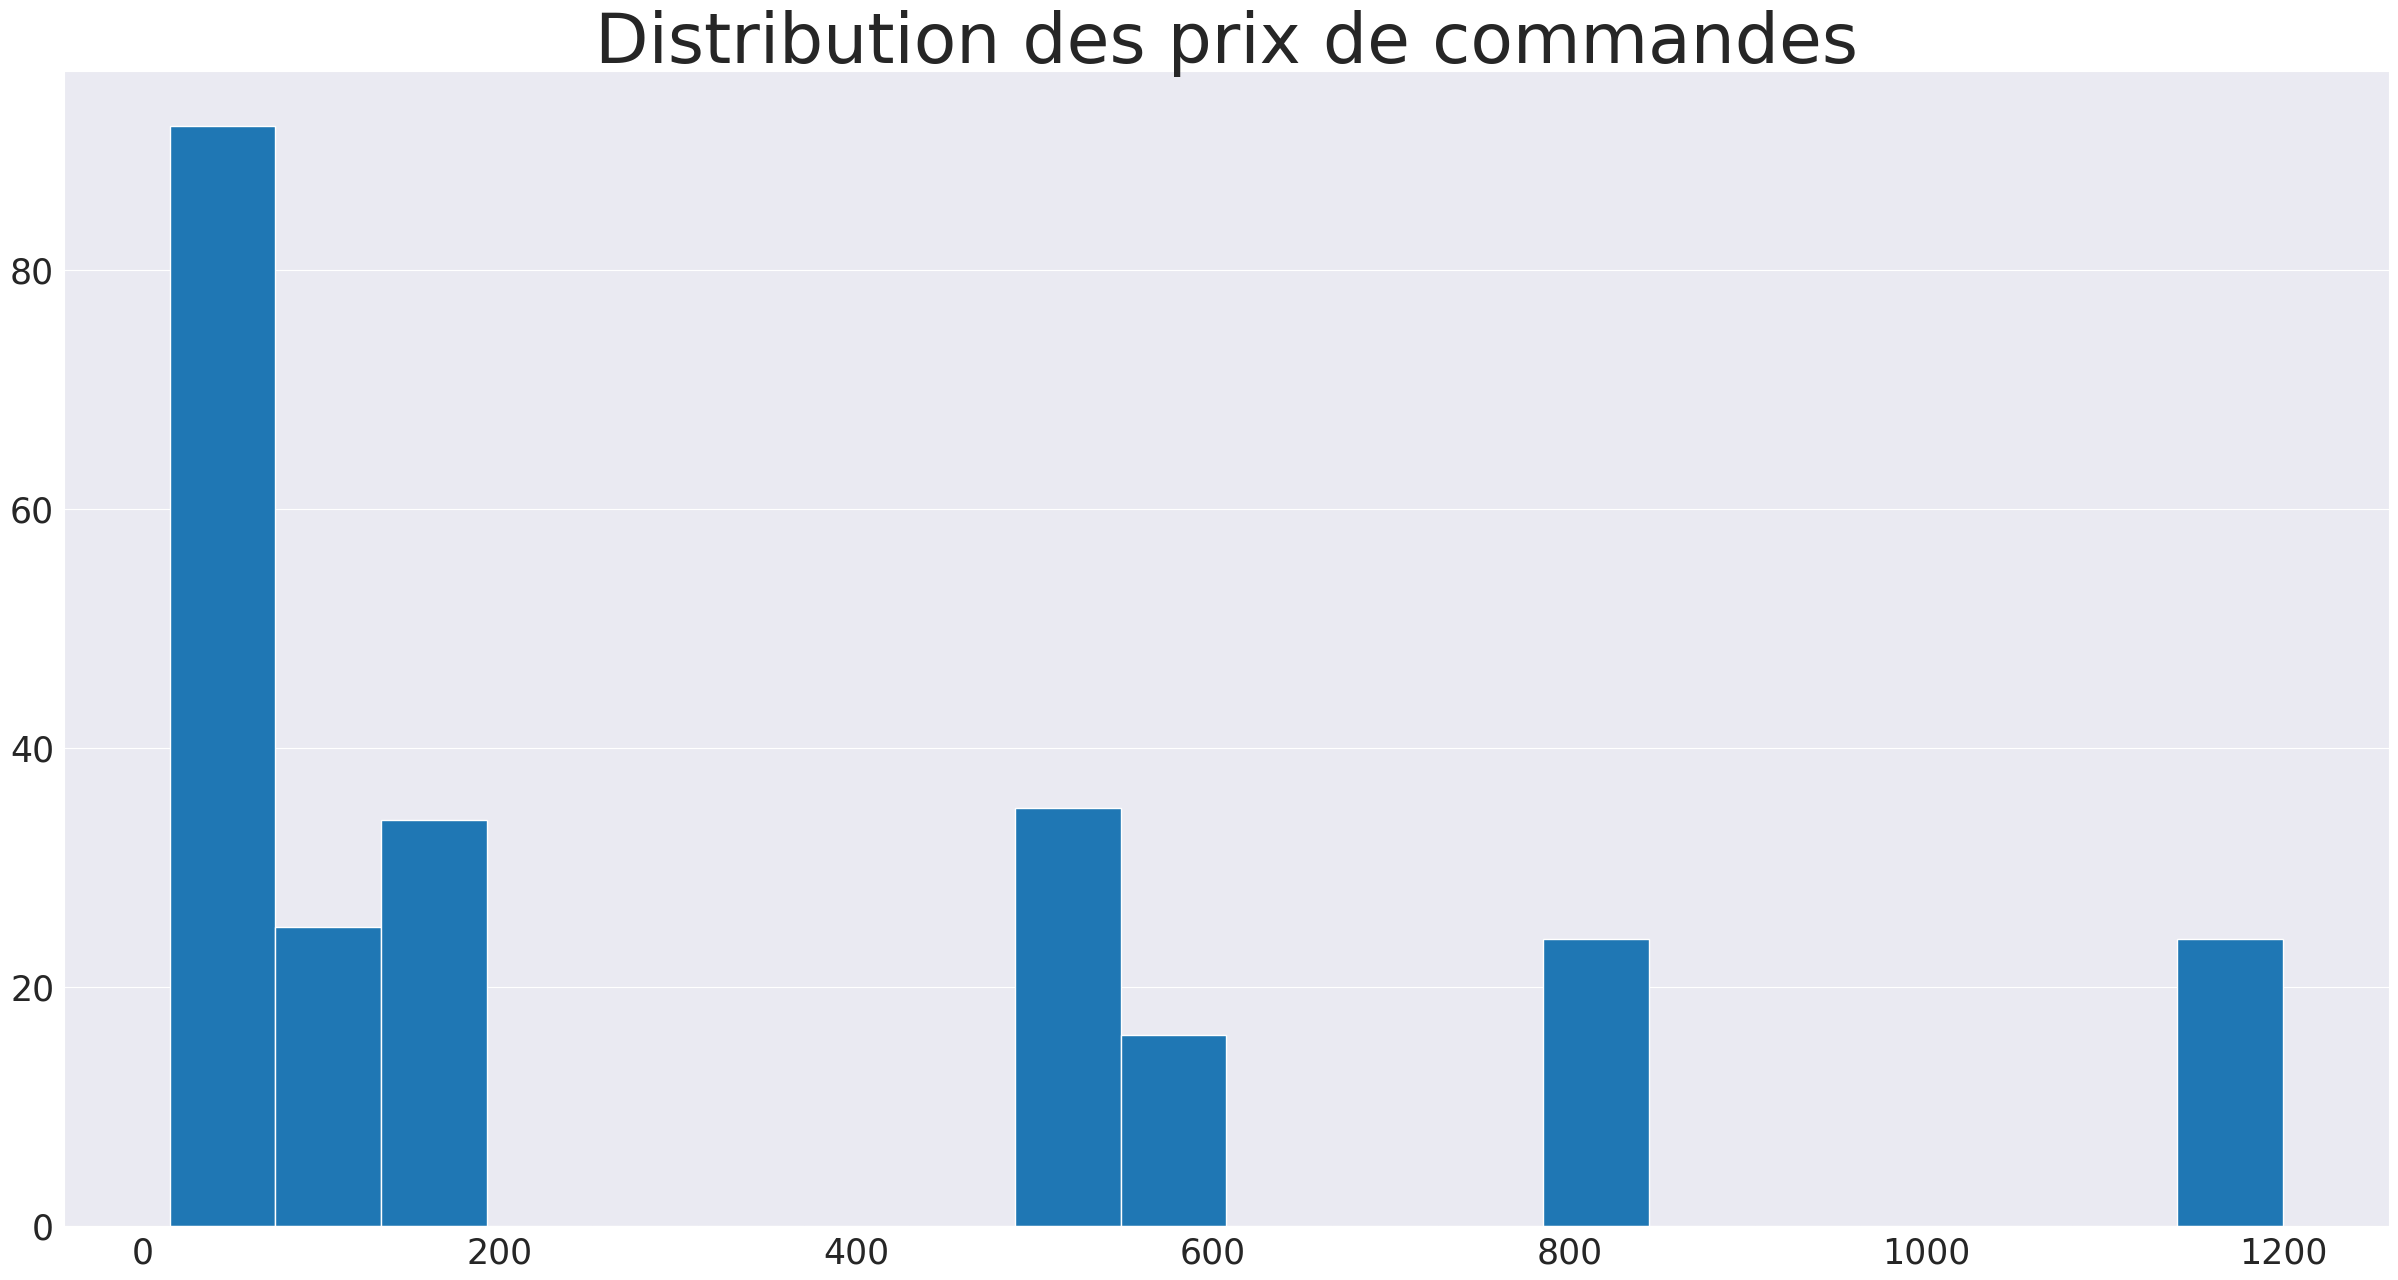

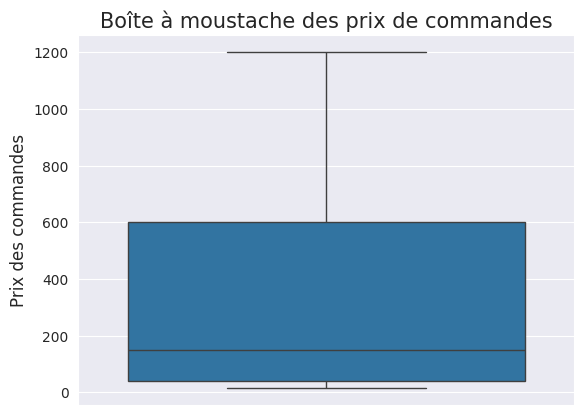

In [32]:
# prix des commandes
print("La moyenne:", data["price"].mean())
print("L'écart-type:", data["price"].std())
print("La médiane:", data["price"].median())
print("1er quartile", np.percentile(data['price'], 25))

# Histogramme

plt.figure(figsize=(30, 15))
plt.title("Distribution des prix de commandes", fontsize=50)
plt.grid(axis="x")
plt.tick_params(labelsize=25)

plt.hist(data["price"], bins=20)
plt.show()

# Boîte à Moustache
plt.title("Boîte à moustache des prix de commandes", fontsize=15)
plt.grid(axis="x")
plt.ylabel("Prix des commandes", fontsize=12)
plt.tick_params(labelsize=10)

sns.boxplot(data["price"])
plt.show()

Par rapport aux prix des commandes, on constate grâce à l'histogramme, une forte concentration entre 40 et 200 dollars. De plus la moyenne (344 dollars) et l'écart-type (380 dollars) indique qu'il y a une forte dispersion des prix des commandes autour de la moyenne. À partir du boxplot, on retiendra que 50% des clients font des achats de produits dont le prix ne dépasse pas les 150 dollars.

La moyenne: 2.856
L'écart-type: 1.4294886326949283
La médiane: 3.0


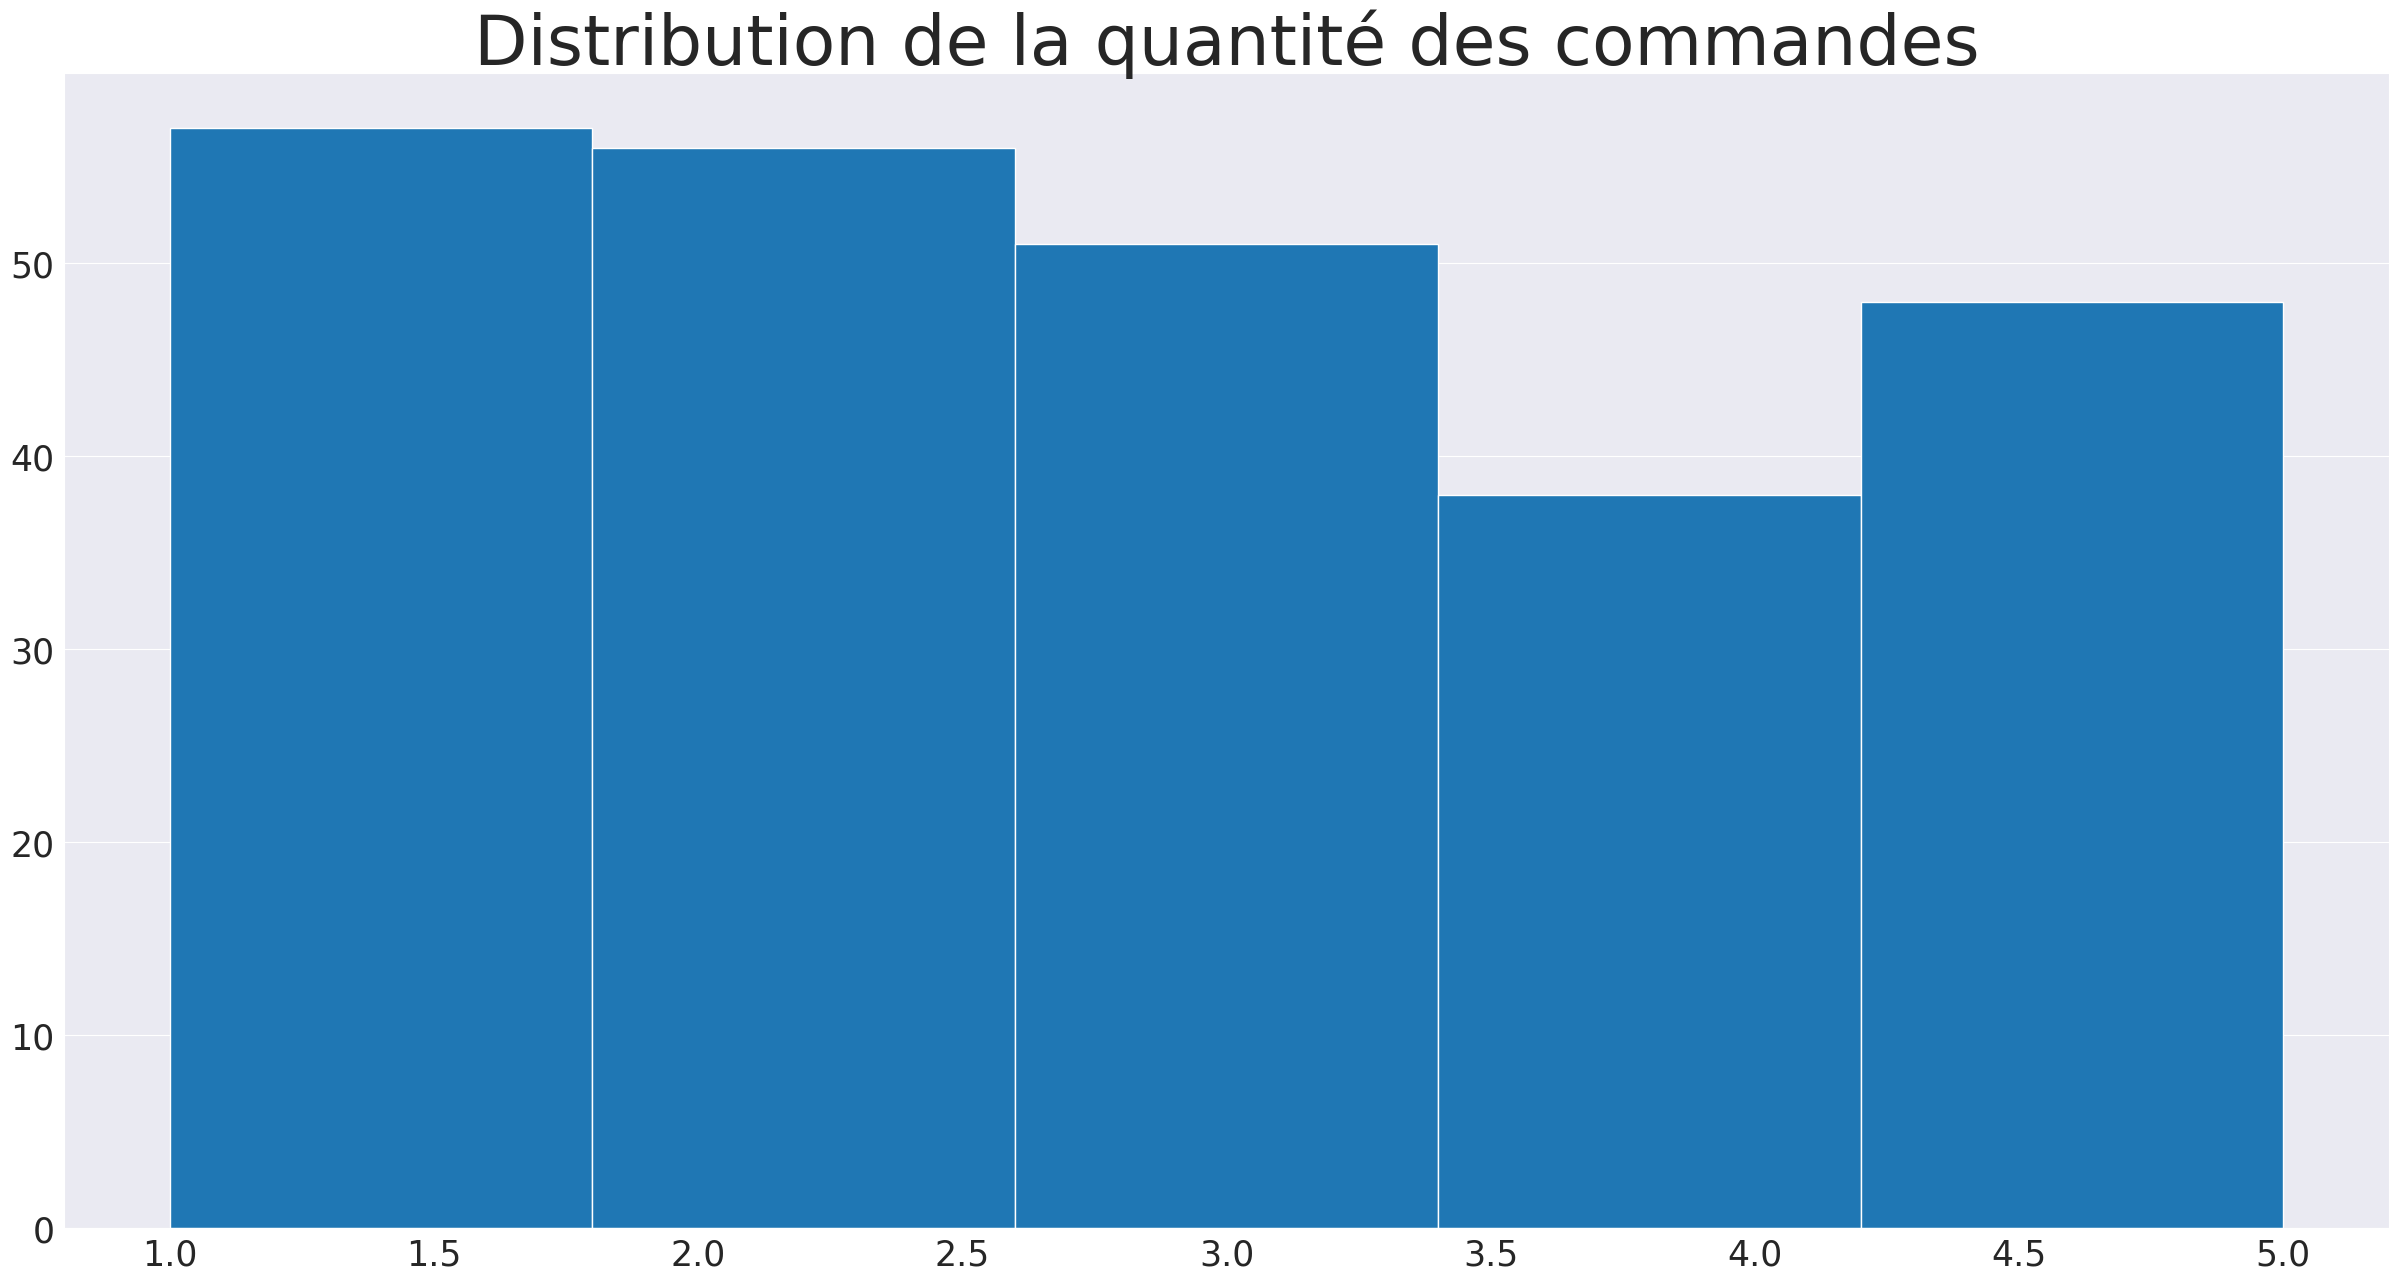

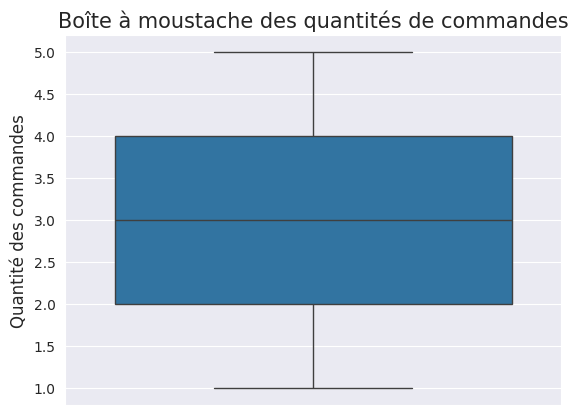

In [33]:
# quantité des commandes
print("La moyenne:", data["quantity"].mean())
print("L'écart-type:", data["quantity"].std())
print("La médiane:", data["quantity"].median())

# Histogramme
plt.figure(figsize=(30, 15))
plt.title("Distribution de la quantité des commandes", fontsize=50)
plt.grid(axis="x")
plt.tick_params(labelsize=25)

plt.hist(data["quantity"], bins=5)
plt.show()

# Boîte à Moustache
plt.title("Boîte à moustache des quantités de commandes", fontsize=15)
plt.grid(axis="x")
plt.ylabel("Quantité des commandes", fontsize=12)
plt.tick_params(labelsize=10)

sns.boxplot(data["quantity"])
plt.show()

La quantité de commande a une répartition peu informative, mais avec le boxplot, on obtient plus de précision : 50% des produits sont commandés en maximum trois exemplaires.

La moyenne: 975.38
L'écart-type: 1252.1122537472172
La médiane: 400.0
1er quartile 40.0
3e quartile 600.0
Le skewness: 1.688496248133406


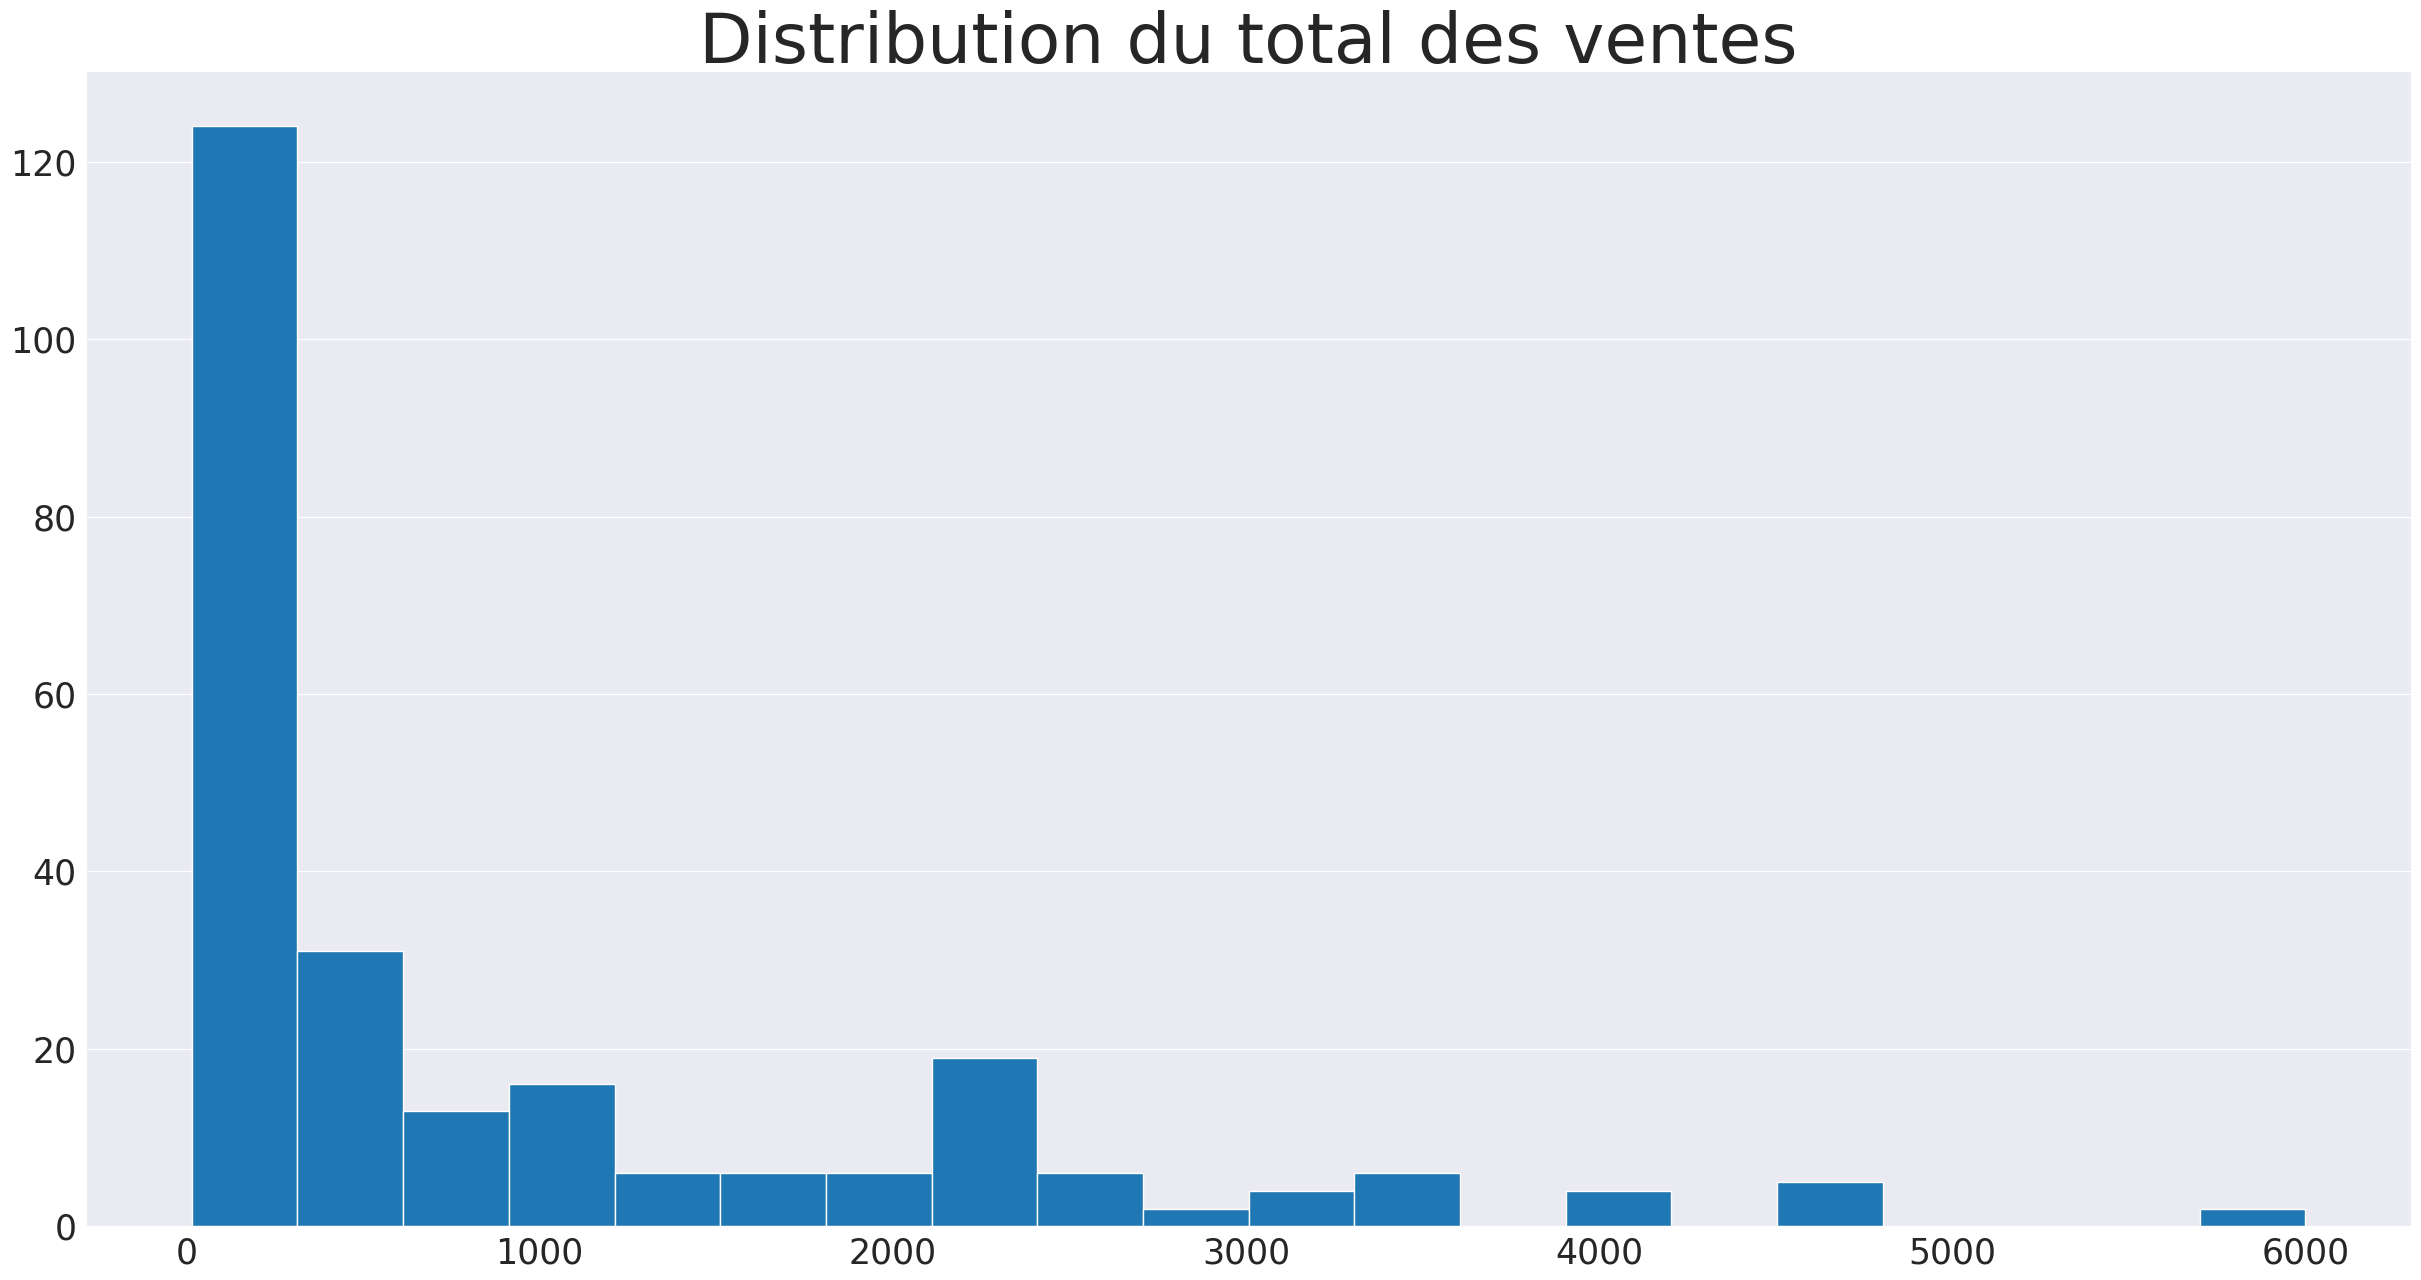

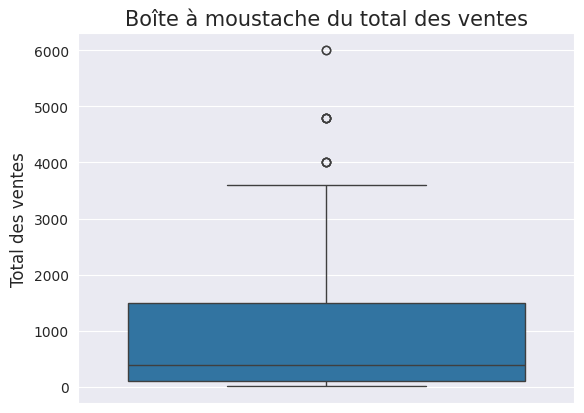

In [34]:
# total des ventes
print("La moyenne:", data["total_sales"].mean())
print("L'écart-type:", data["total_sales"].std())
print("La médiane:", data["total_sales"].median())
print("1er quartile", np.percentile(data['price'], 25))
print("3e quartile", np.percentile(data['price'], 75))
print("Le skewness:", data["total_sales"].skew())

# Histogramme
plt.figure(figsize=(30, 15))
plt.title("Distribution du total des ventes", fontsize=50)
plt.grid(axis="x")
plt.tick_params(labelsize=25)

plt.hist(data["total_sales"], bins=20)
plt.show()

# Boîte à Moustache
plt.title("Boîte à moustache du total des ventes", fontsize=15)
plt.grid(axis="x")
plt.ylabel("Total des ventes", fontsize=12)
plt.tick_params(labelsize=10)

sns.boxplot(data["total_sales"])
plt.show()

Enfin, la répartition du total des ventes, présente une très forte concentration entre 40 dollars et 600 dollars environ puis s'étale vers la droite (skewness > 1). On en déduit qu'au-delà de 600 dollars le nombre de commandes diminue drastiquement. Les clients ont moins tendances à dépenser au-delà de 600 dollars pour la même commande. De plus la médiane indique bien que 50% des commandes ont un prix total en dessous des 400 dollars. On remarque également des outliers qui montrent que les commandes dont le prix total dépasse les 3500 dollars sont très rares, voire exceptionnelles.

### Analyse Bivariée

Avant de se lancer dans cette étape de notre analyse, commençons d'abord par nous poser les bonnes questions. En effet l'objectif principal est d'identifier les actions leviers à mettre en place pour optimiser les ventes de l'entreprise. Et pour cela, il faut :
- Repérer les catégories et produits les plus performants (et ceux qui le sont moins) pour ajuster le catalogue.
- Identifier les segments de clients ou régions géographiques où des actions marketing ciblées peuvent augmenter les ventes.
- Détecter les tendances de demande pour mieux planifier les stocks et éviter les ruptures ou les surstocks.
- Comprendre les causes d’annulations de commandes ou d’abandons de panier pour proposer des solutions.
- Fournir des recommandations pour augmenter le chiffre d’affaires global et la rentabilité.

Voici donc quelques questions soulevées par chacun de ces objectifs :

1. Quelles sont les périodes pendant lesquelles les clients font le plus de commandes pour un produit en particulier ?
2. Quel est le prix moyen par catégorie ?
3. Quels sont les catégories de produits qui ont le plus tendances à être achetés en grandes quantités ?
4. Quels produits et quelles catégories de produits rapportent le plus en termes de ventes total ?
5. Est-ce que dans certaines villes, certains produits ont plus tendance à être commandé que d'autres ?
6. Quels sont les produits qui voient le plus souvent leur commande annulée ?
7. Existe-t-il une relation entre le prix d'un produit et la quantité commandé ?
8. Existe-t-il une relation entre le prix et les revenus totaux générés ?
9. Le prix des produits influence-t-il le statut de la commande ?
10. Est-ce que plus le montant de la commande est élévée plus le client aura tendance à ne pas l'à completer ?
11. Dans quelles villes on obtient le plus de ventes totales ?
12. Est-ce que le moyen de paiement influence le statut de la commande ?

#### *Quelles sont les périodes pendant lesquelles les clients font le plus de commandes pour un produit en particulier ?*

In [101]:
# Trions les commandes par périodes d'un mois et par produits
data_grouped_by_month = data.pivot_table(index=data['date'].dt.to_period('M'),
                                         columns=data['product'],
                                         values='product',
                                         aggfunc='count',
                                         fill_value=0)
data_grouped_by_month


product,Book,Headphones,Jeans,Laptop,Refrigerator,Running Shoes,Smartphone,Smartwatch,T-Shirt,Washing Machine
date,,,,,,,,,,
2025-02,13,13,6,12,11,10,18,13,8,9
2025-03,12,11,14,11,13,17,17,20,9,7
2025-04,0,1,0,1,0,0,0,1,3,0


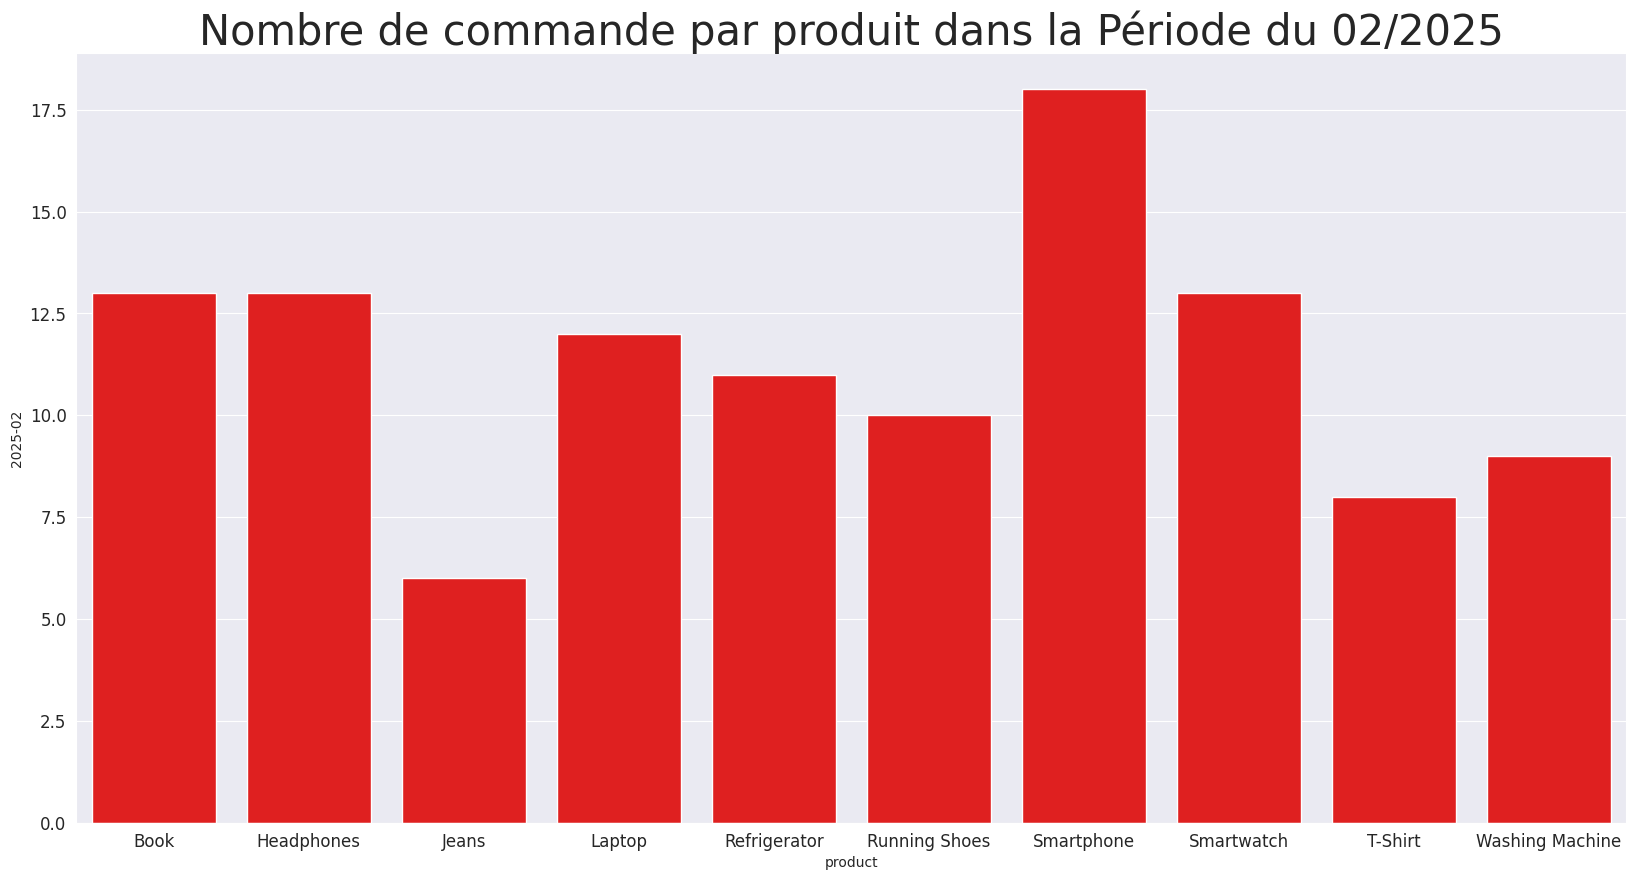

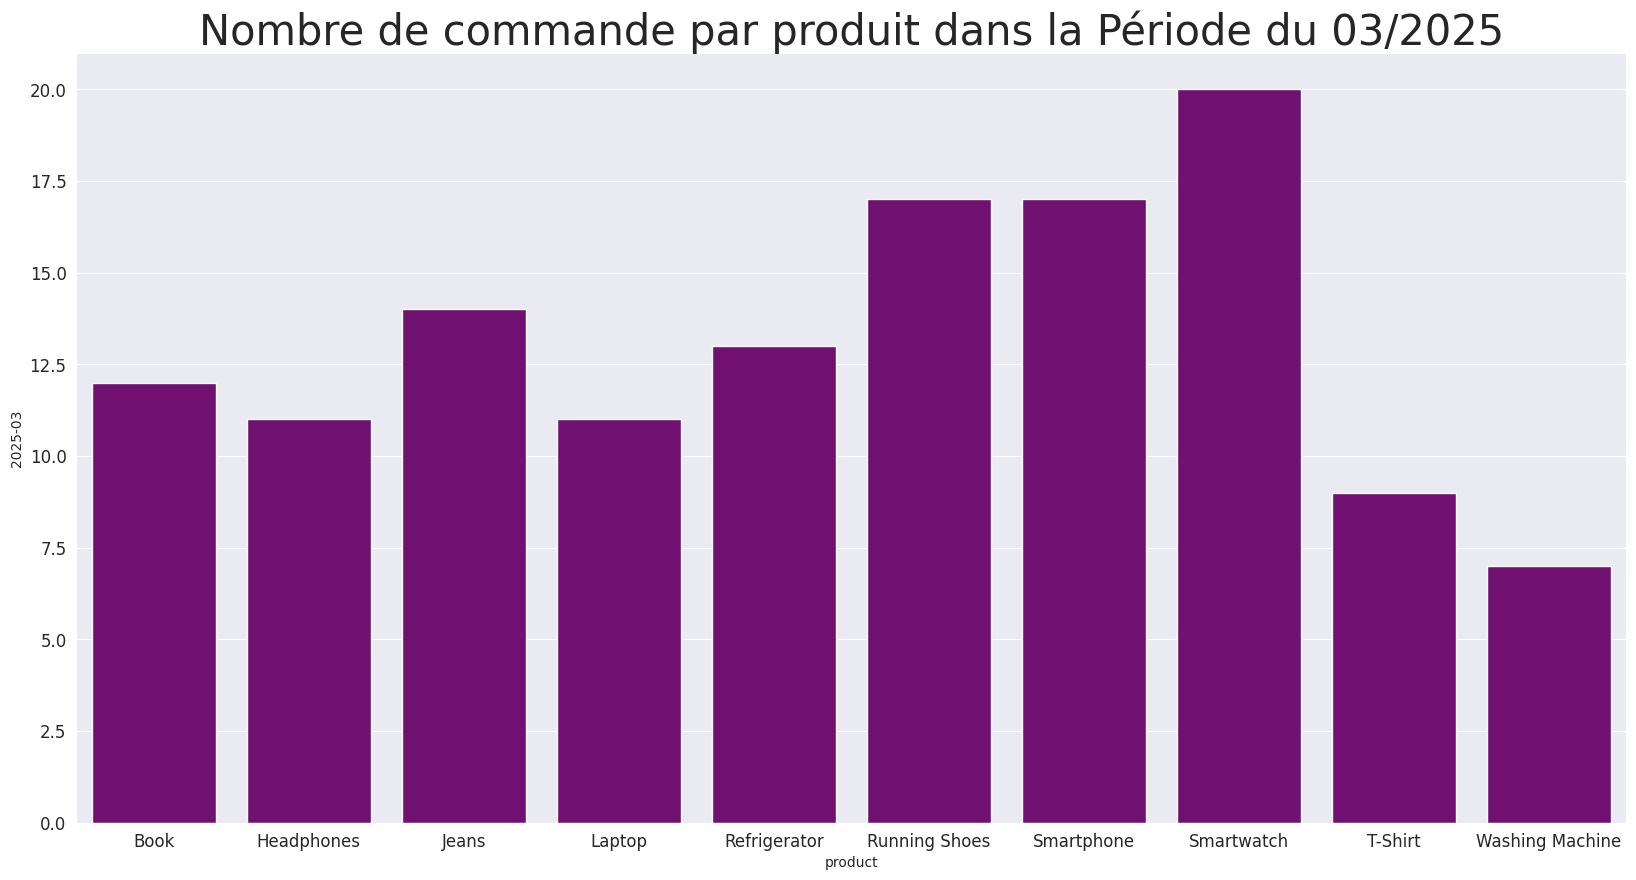

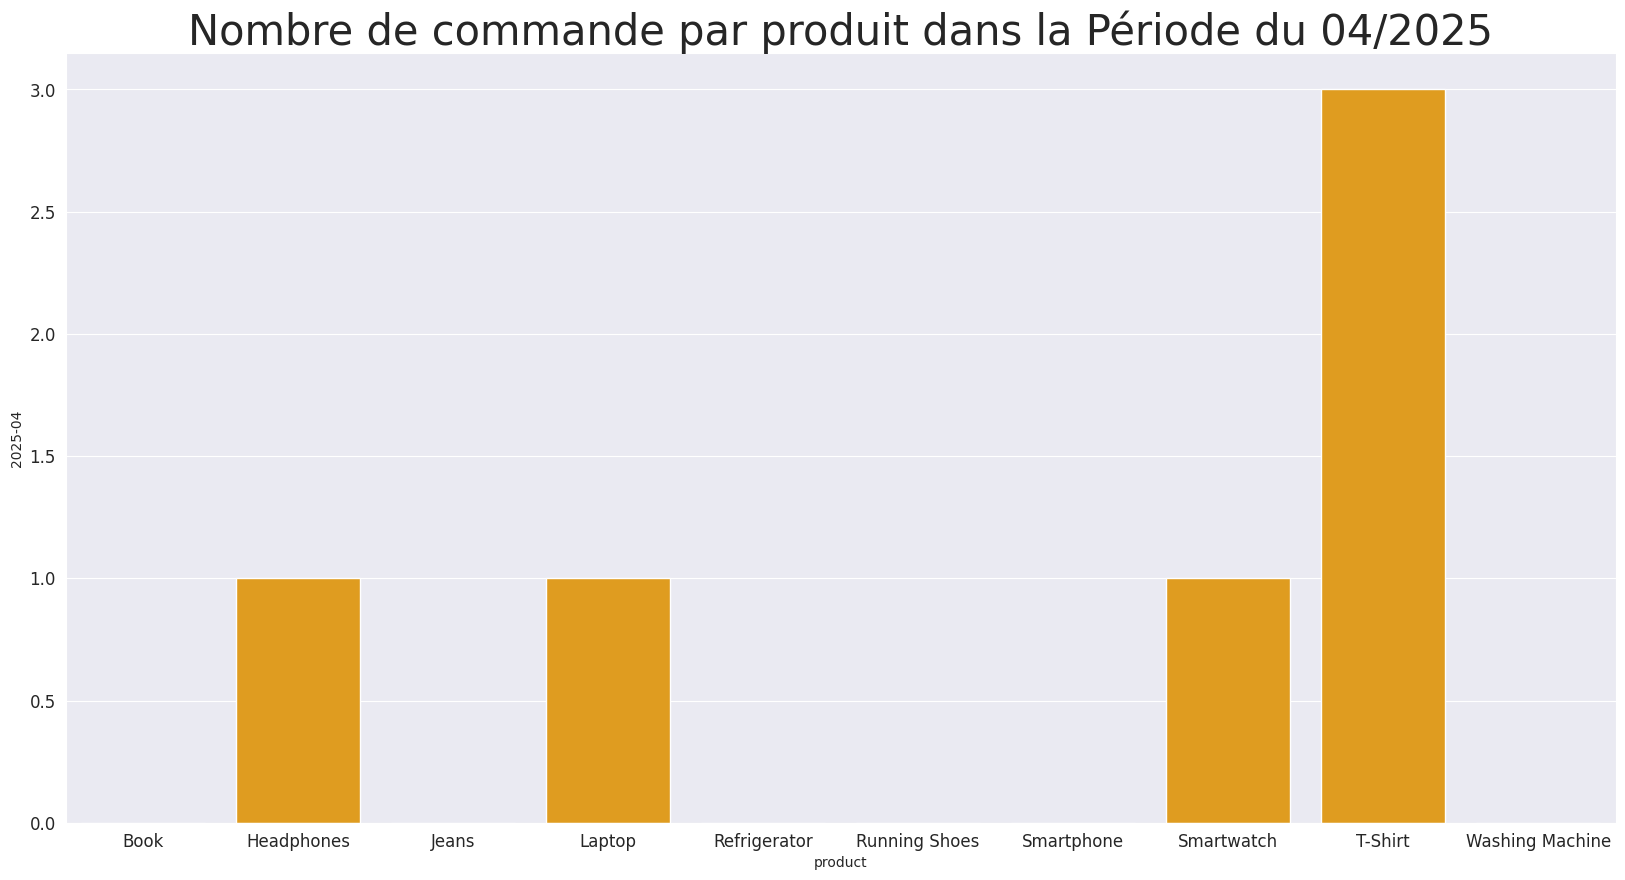

In [127]:
# Visualisation avec des diagrammes en barre
colors = ["red", "purple", "orange"]
period = ["Période du 02/2025", "Période du 03/2025", "Période du 04/2025"]
for i in range(len(data_grouped_by_month)):
    table_one = data_grouped_by_month.iloc[i, :]
    plt.figure(figsize=(20, 10))
    plt.title(f"Nombre de commande par produit dans la {period[i]}", fontsize=30)
    plt.tick_params(labelsize=12)

    sns.barplot(table_one, color=colors[i])
    plt.show()


Les résultats obtenus ici ne sont pas assez significatifs pour répondre à la problématique. Il nous faudrait des données sur une plus grande période (au moins 2 à 3 ans) pour en déduire des insights pertinents. Cependant, il est quand même notable que les Smartphones et smartwatch ont le dessus sur le marché. On était déja arrivé à cette conclusion lors de l'analyse univariée.

#### *Quel est le prix moyen par catégorie ?*


In [200]:
# Aggrégation des données par catégorie
data_grouped_by_category = data.groupby("category")['price'].mean()
data_grouped_by_category = pd.DataFrame(data_grouped_by_category)
data_grouped_by_category

,price
category,
Books,15.000000
Clothing,30.000000
Electronics,375.423729
Footwear,60.000000
Home Appliances,960.000000


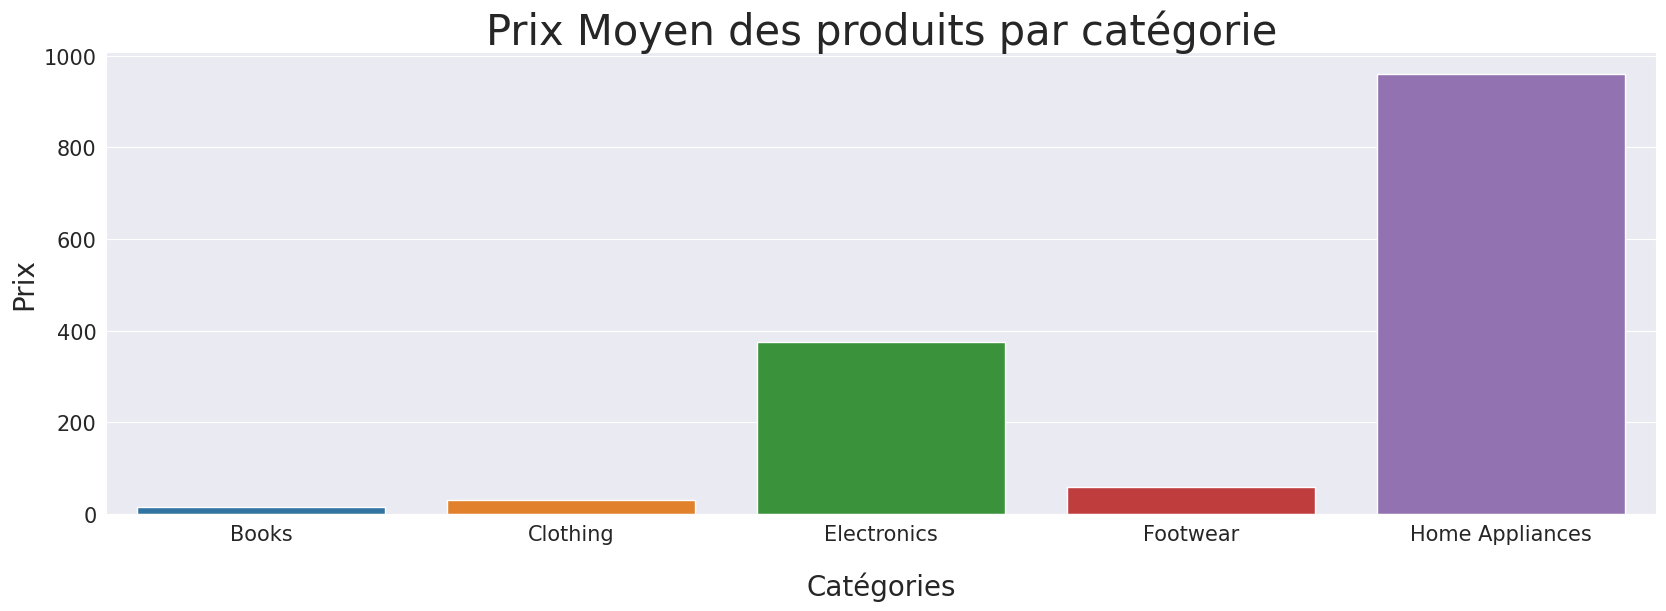

In [202]:
# Visualisation avec un diagramme en barres
plt.figure(figsize=(20, 6))
plt.title("Prix Moyen des produits par catégorie", fontsize=30)
plt.xlabel("Catégories", fontsize=20, labelpad=20); plt.ylabel("Prix", fontsize=20)
plt.tick_params(labelsize=15)

sns.barplot(data=data_grouped_by_category, x='category', y='price', hue='category',  palette='tab10')
plt.show()

À l'issue de notre analyse univariée, on avait remarqué que la grande majorité de nos clients ne dépensent pas plus de 600 dollars pour la même commande. Ainsi, d'après le graphe ci-dessus, on peut déduire que nos clients auront moins tendance à faire des achats de produits de la catégorie "Home Appliances" dont le prix moyen dépasse largement les 600 dollars. Il faudra donc privilégier les recommandations pour les produits des catégories Books, Clothing, Electronics et Footwear.

#### *Quels sont les catégories de produits qui ont le plus tendances à être achetés en grandes quantités ?*


In [176]:
# Grouper par catégorie la quantité commandée
data_grouped_by_product = data.groupby("category")['quantity'].mean().round(2)
data_grouped_by_product

category
Books              2.76
Clothing           2.88
Electronics        2.95
Footwear           2.67
Home Appliances    2.75
Name: quantity, dtype: float64

En moyenne, pour toutes les catégories, les produits sont commandées en 3 quantités par commande. Mais sachant qu'il y a une forte demande pour les produits de la catégorie Electronics, il faudra prévoir un stock plus important pour cette catégorie de produits.

#### *Quels produits et Quelles catégories de produits rapportent le plus en termes de ventes total ?*

In [196]:
produits_winner = data.groupby('product')['total_sales'].mean().round(2)
produits_winner.sort_values(ascending=False, inplace=True)
produits_winner = pd.DataFrame(produits_winner)
produits_winner

,total_sales
product,
Refrigerator,3250.00
Laptop,2433.33
Washing Machine,1687.50
Smartphone,1385.71
Smartwatch,463.24
Headphones,292.00
Running Shoes,160.00
Jeans,124.00
T-Shirt,53.00


In [294]:
category_winner = data.groupby('category')['total_sales'].mean().round(2)
category_winner.sort_values(ascending=False, inplace=True)
category_winner = pd.DataFrame(category_winner)
category_winner

,total_sales
category,
Home Appliances,2625.00
Electronics,1101.27
Footwear,160.00
Clothing,88.50
Books,41.40


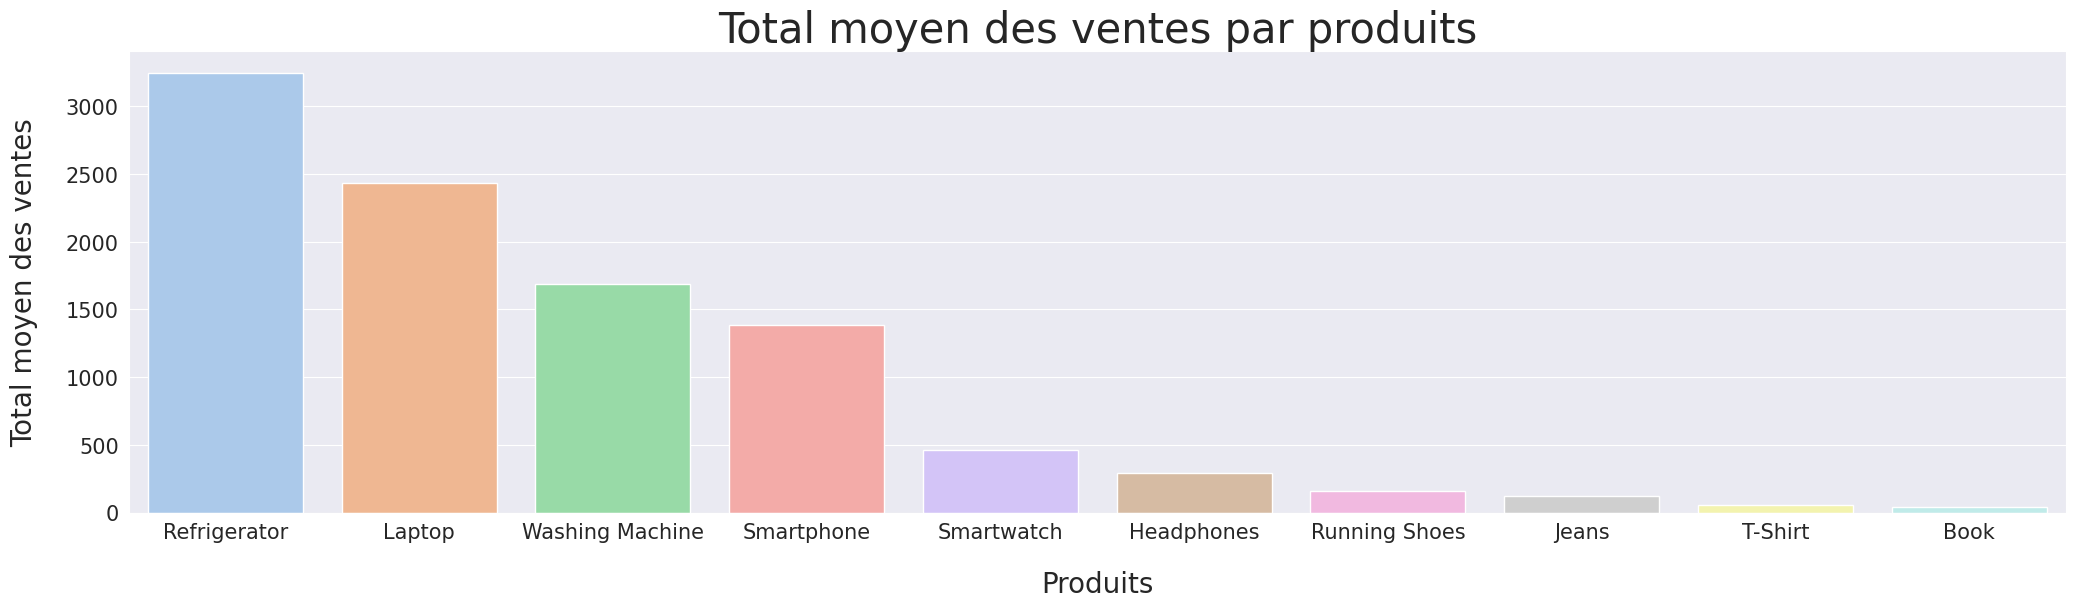

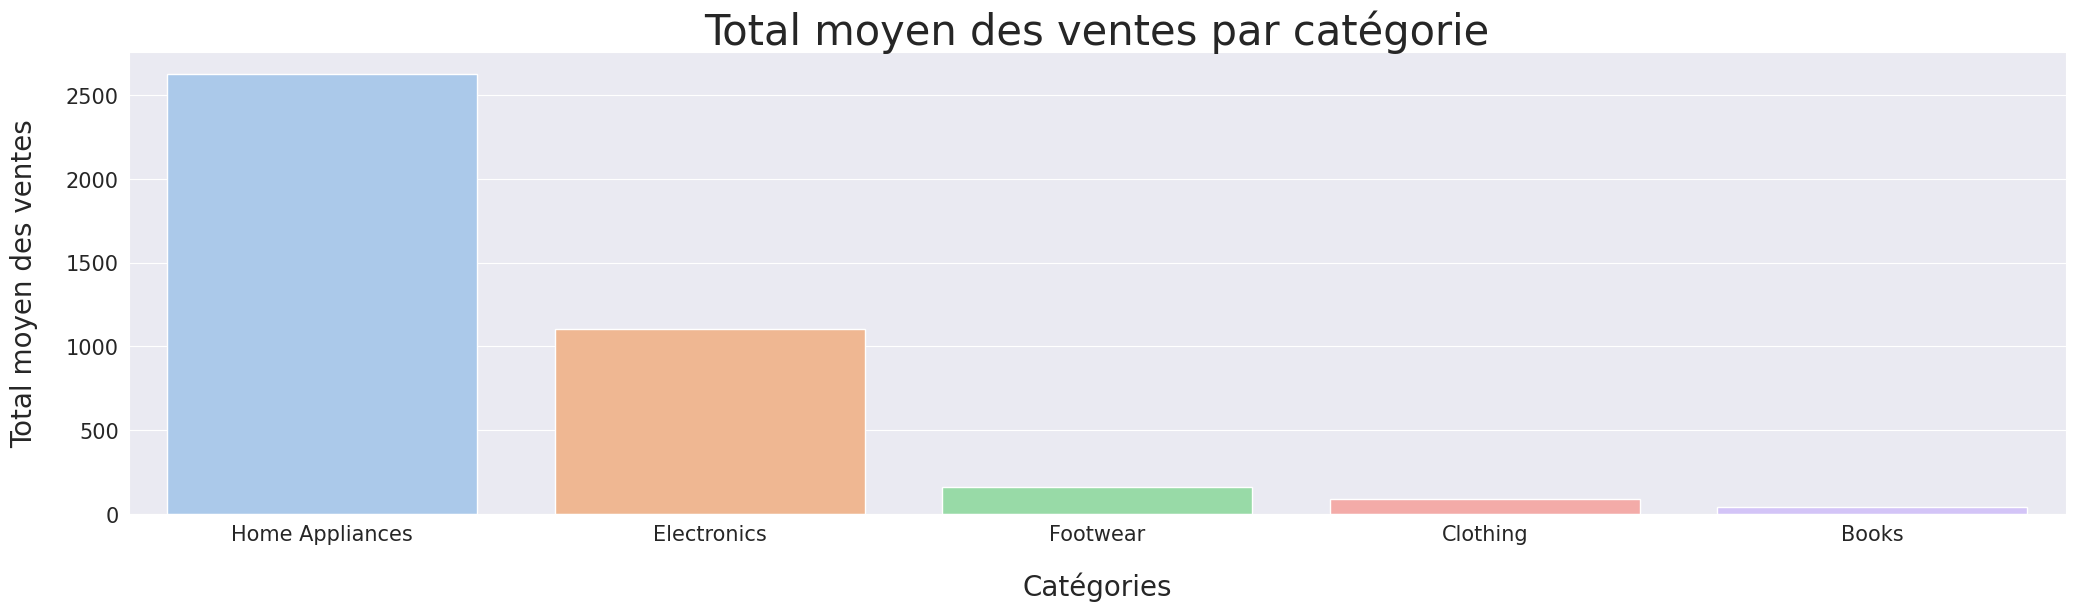

In [298]:
# Visualisation

# Product
plt.figure(figsize=(25, 6))
plt.title("Total moyen des ventes par produits", fontsize=30)
plt.xlabel("Produits", fontsize=20, labelpad=20); plt.ylabel("Total moyen des ventes", fontsize=20, labelpad=20)
plt.tick_params(labelsize=15)

sns.barplot(data=produits_winner, x='product', y='total_sales', hue='product', palette='pastel')
plt.show()

# Category
plt.figure(figsize=(25, 6))
plt.title("Total moyen des ventes par catégorie", fontsize=30)
plt.xlabel("Catégories", fontsize=20, labelpad=20); plt.ylabel("Total moyen des ventes", fontsize=20, labelpad=20)
plt.tick_params(labelsize=15)

sns.barplot(data=category_winner, x='category', y='total_sales', hue='category', palette='pastel')
plt.show()

En termes de ventes totales, les réfrigérateurs, ordinateurs portables et machines à laver rapportent beaucoup plus que les autres produits. Cela est sans doute dû à leur prix unitaire assez élevé. Cependant, le smartphone dépasse les 1000 dollars de ventes totales moyens bien que son prix ne soit pas aussi élévé que ceux cités précédemment. Ce produit à donc un réel potentiel sur le marché. Quant aux catégories, le graphe obtenu réflète ce qui se passe avec chaque produit, les 'Home Appliances' génerent le plus d'argent et derrière suivent les "Electronics".

#### *Est-ce que dans certaines villes, certains produits ont plus tendance à être commandé que d'autres ?*

In [285]:
product_by_city = data.pivot_table(index=data['product'], columns='customer_location', values='quantity', aggfunc='sum', fill_value=0)
product_by_city

customer_location,Boston,Chicago,Dallas,Denver,Houston,Los Angeles,Miami,New York,San Francisco,Seattle
product,,,,,,,,,,
Book,8,14,5,5,2,2,8,2,17,6
Headphones,2,7,3,3,16,5,10,10,8,9
Jeans,4,4,20,2,0,2,0,16,4,10
Laptop,5,3,0,10,10,10,11,7,13,4
Refrigerator,10,5,13,11,4,3,4,4,2,9
Running Shoes,3,4,8,6,13,11,13,6,8,0
Smartphone,13,19,9,8,10,3,19,4,1,11
Smartwatch,15,2,11,11,22,7,8,13,8,8
T-Shirt,8,5,7,16,4,0,5,8,0,0


In [293]:
table = pd.Series()
for column in product_by_city.columns:
    table[column] = product_by_city[column].sort_values(ascending=False).head(1).index[0]
table

Boston              Smartwatch
Chicago             Smartphone
Dallas                   Jeans
Denver                 T-Shirt
Houston             Smartwatch
Los Angeles      Running Shoes
Miami               Smartphone
New York                 Jeans
San Francisco             Book
Seattle             Smartphone
dtype: object

C'est encore le smartphone qui domine dans la plupart des villes, mais le tableau obtenu ne nous permet pas directement d'apporter une réponse à la problématique posée. Nous devrons passer par des tests statistiques

#### *Quels sont les produits qui voient le plus souvent leur commande annulée ?*

In [330]:
product_cancelled = pd.DataFrame(data.loc[data.status == 'Cancelled', 'product'])
product_cancelled = product_cancelled.groupby('product')['product'].count()
product_cancelled.sort_values(ascending=False, inplace=True)
product_cancelled = pd.DataFrame(product_cancelled)
product_cancelled.rename(columns={'product':'Nbr_cancelled'}, inplace=True)
product_cancelled

,Nbr_cancelled
product,
Headphones,10
Jeans,9
Smartwatch,9
Smartphone,9
Washing Machine,8
Refrigerator,8
Running Shoes,8
Book,7
Laptop,5


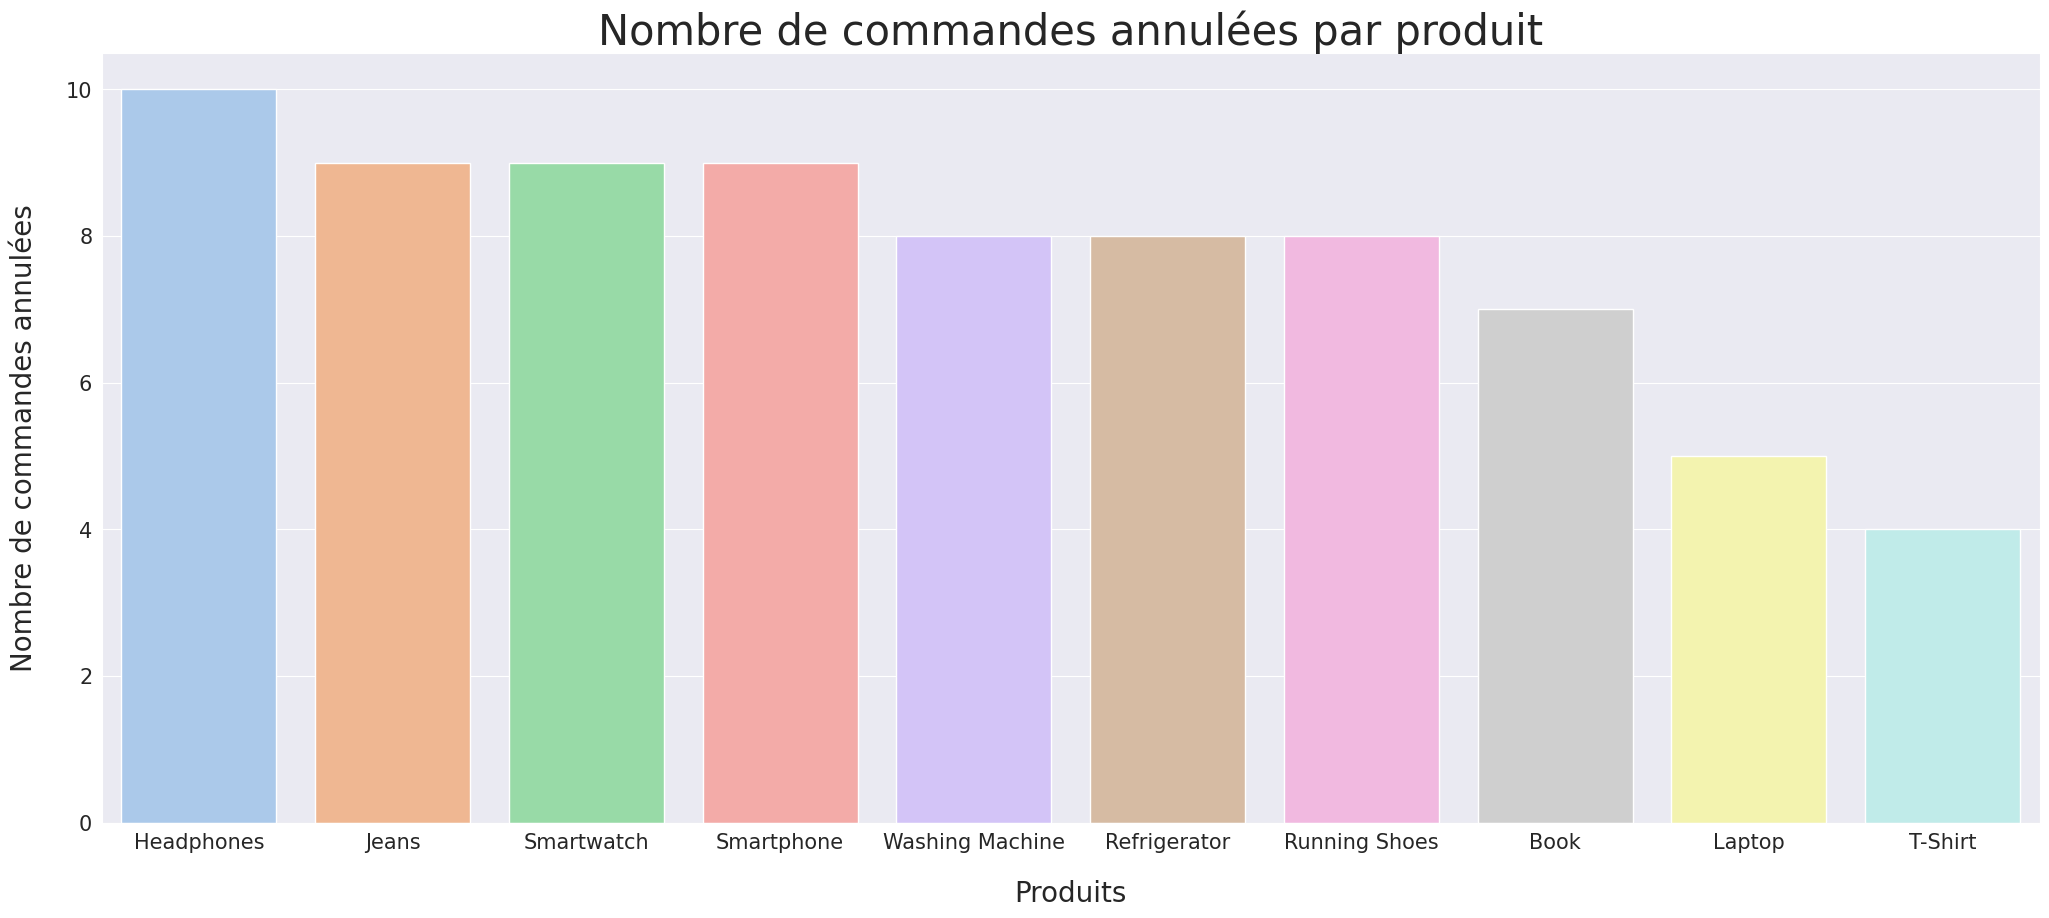

In [331]:
plt.figure(figsize=(25, 10))
plt.title("Nombre de commandes annulées par produit", fontsize=30)
plt.xlabel("Produits", fontsize=20, labelpad=20); plt.ylabel("Nombre de commandes annulées", fontsize=20, labelpad=20)
plt.tick_params(labelsize=15)

sns.barplot(data=product_cancelled, x='product', y='Nbr_cancelled',  hue='product', palette='pastel')
plt.show()